# Анализ ценовой динамики (Core Metric)

Что смотреть:

- Средняя цена за м² по районам/типам жилья.

- Распределение цен (гистограммы, box-plot для выбросов).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data.csv')

df.head()

,author_type,url,location,deal_type,accommodation_type,price,year_of_construction,house_material_type,living_meters,floors_count,underground,creation_date,price_per_m2,underground_list,month,year_month,year,day_of_week
0,realtor_based,https://www.cian.ru/rent/flat/319524074/,Москва,rent_long,flat,290300.0,NaN,monolithBrick,60.1,28,"Багратионовская, Парк Победы, Филёвский парк",2025-07-08,4830.282862,"['Багратионовская', 'Парк Победы', 'Филёвский ...",7,2025-07,2025,1
1,realtor_based,https://www.cian.ru/rent/flat/313850443/,Москва,rent_long,flat,200600.0,2005.0,panel,53.3,22,"Поклонная, Ломоносовский проспект, Киевская",2025-02-18,3763.602251,"['Поклонная', 'Ломоносовский проспект', 'Киевс...",2,2025-02,2025,1
2,realtor_based,https://www.cian.ru/rent/flat/317523322/,Москва,rent_long,flat,84300.0,1960.0,panel,25.0,5,"Ломоносовский проспект, Минская, Минская",2025-05-14,3372.000000,"['Ломоносовский проспект', 'Минская', 'Минская']",5,2025-05,2025,2
3,realtor_based,https://www.cian.ru/rent/flat/316058969/,Москва,rent_long,flat,79800.0,2024.0,panel,18.0,24,"Бульвар Генерала Карбышева, Серебряный Бор, Щу...",2025-04-09,4433.333333,"['Бульвар Генерала Карбышева', 'Серебряный Бор...",4,2025-04,2025,2
4,realtor_based,https://www.cian.ru/rent/flat/319463100/,Москва,rent_long,flat,95200.0,2022.0,monolith,18.0,25,"Октябрьское поле, Бульвар Генерала Карбышева, ...",2025-07-05,5288.888889,"['Октябрьское поле', 'Бульвар Генерала Карбыше...",7,2025-07,2025,5


## Средняя цена за м² по метро

Топ-10 дорогих районов:
underground_list
['Чистые пруды', 'Тургеневская', 'Китай-город', 'Сретенский бульвар', 'Лубянка', 'Курская', 'Красные ворота', 'Площадь Революции', 'Чкаловская', 'Кузнецкий мост', 'Курская']                        15666.666667
['Деловой центр', 'Москва-Сити', 'Деловой центр', 'Москва-Сити', 'Деловой центр']                                                                                                                    15000.000000
['Пушкинская', 'Тверская', 'Маяковская', 'Чеховская', 'Баррикадная', 'Арбатская']                                                                                                                    15000.000000
['Кропоткинская', 'Парк Культуры', 'Смоленская', 'Боровицкая']                                                                                                                                       15000.000000
['Деловой центр', 'Деловой центр', 'Москва-Сити', 'Деловой центр', 'Москва-Сити', 'Москва-Сити']                       

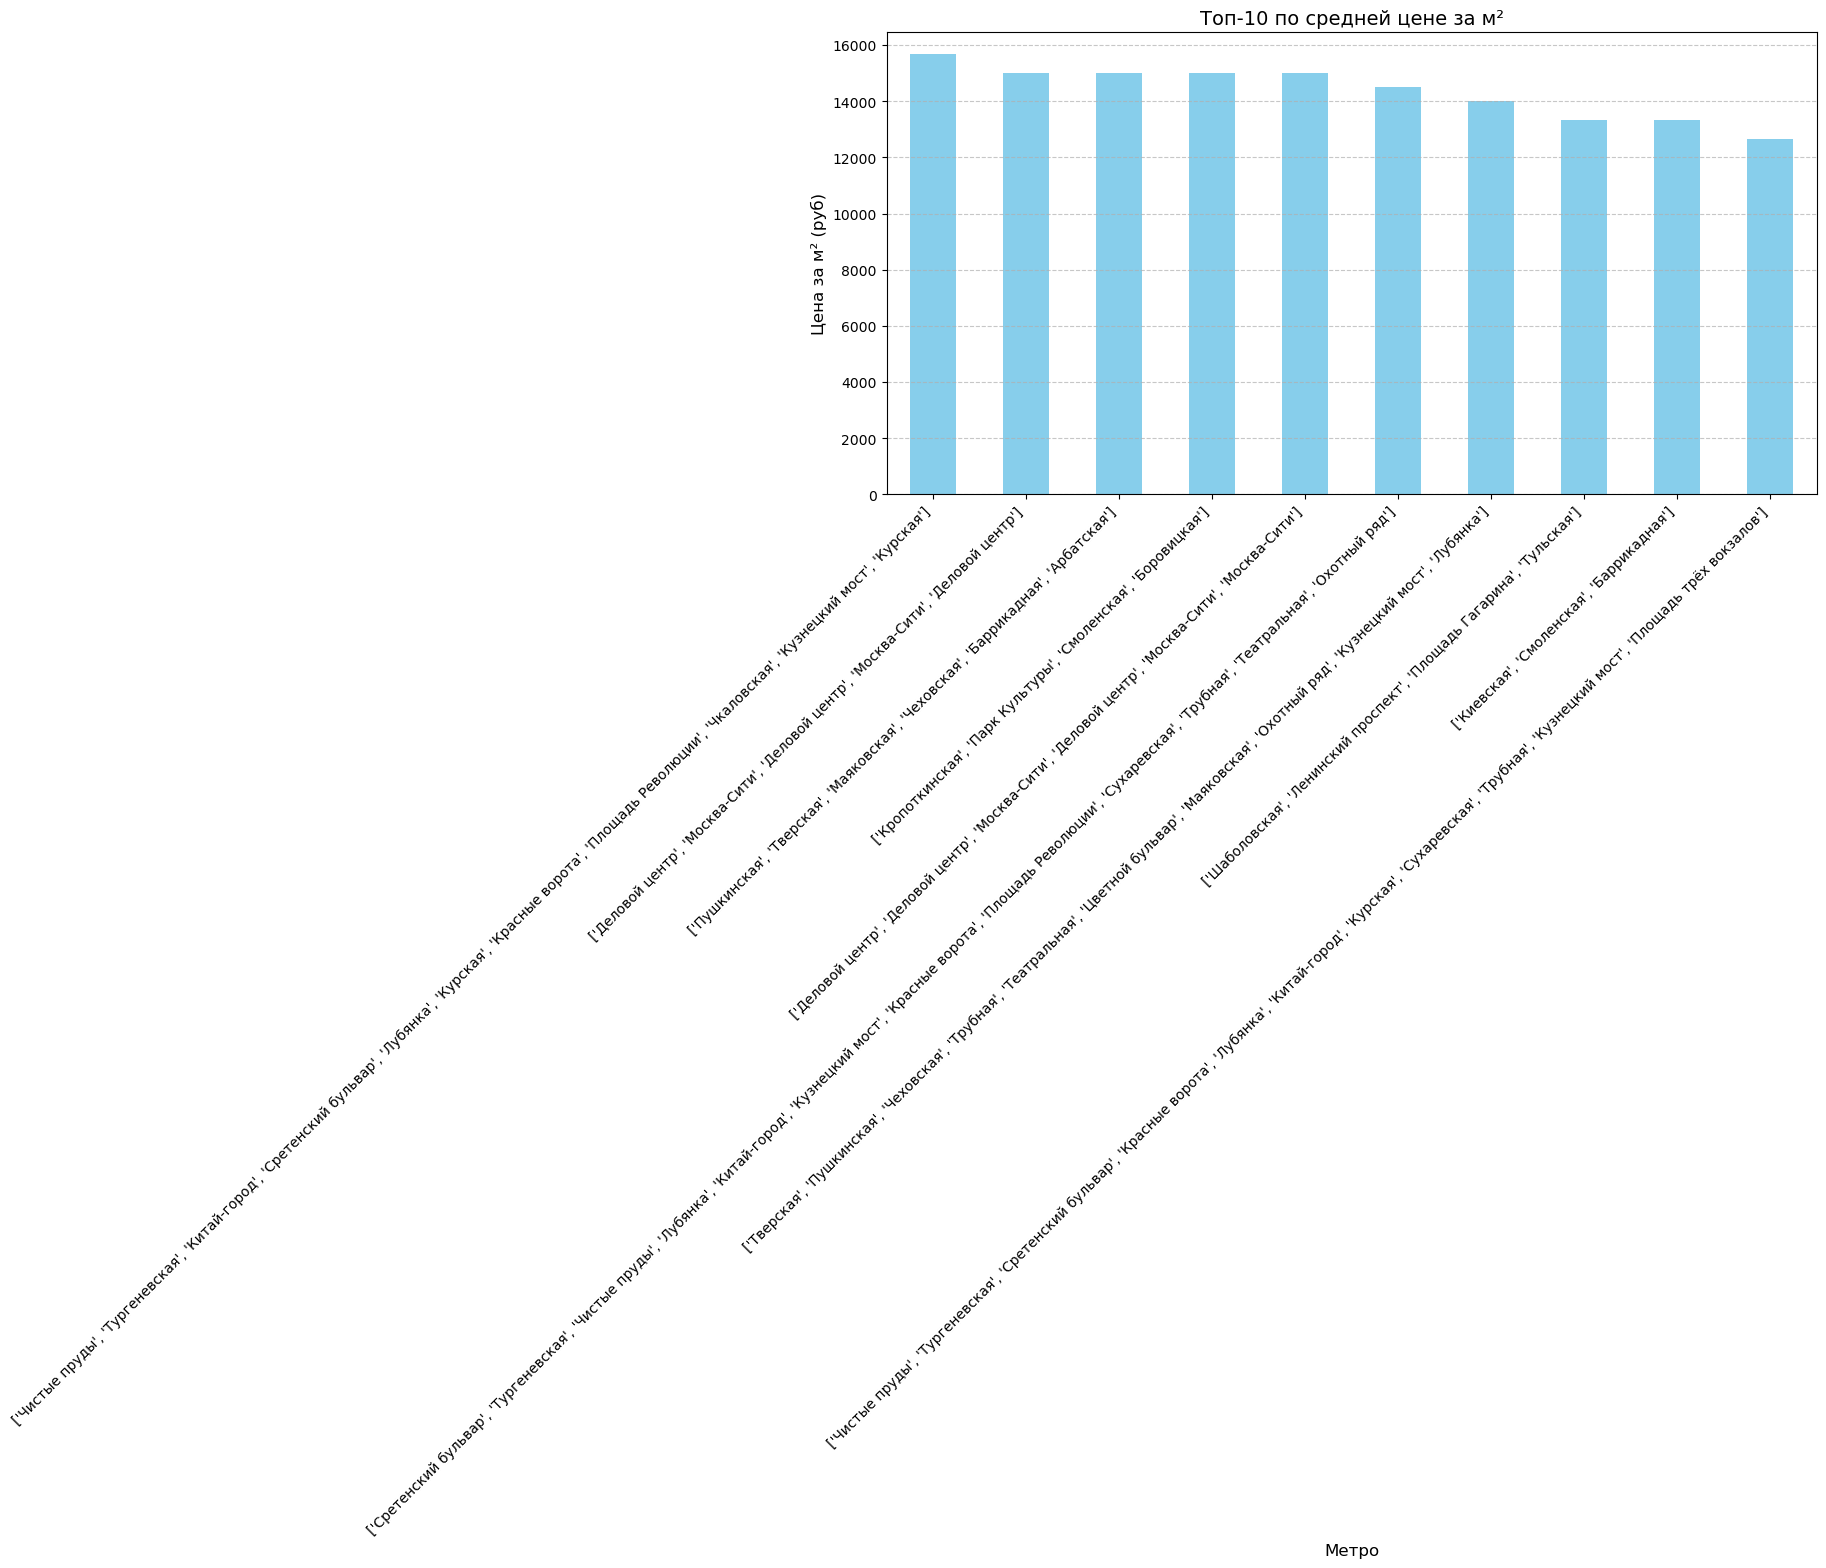

In [5]:
# Разворачиваем списки метро в отдельные строки
df_exploded = df.explode('underground_list')

# Удаляем возможные пустые значения
df_exploded = df_exploded.dropna(subset=['underground_list'])

avg_price_metro = df_exploded.groupby('underground_list')['price_per_m2'].mean().sort_values(ascending=False)


print("Топ-10 дорогих районов:")
print(avg_price_metro.head(10))


plt.figure(figsize=(12, 6))
avg_price_metro.head(10).plot(kind='bar', color='skyblue')
plt.title('Топ-10 по средней цене за м²', fontsize=14)
plt.xlabel('Метро', fontsize=12)
plt.ylabel('Цена за м² (руб)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

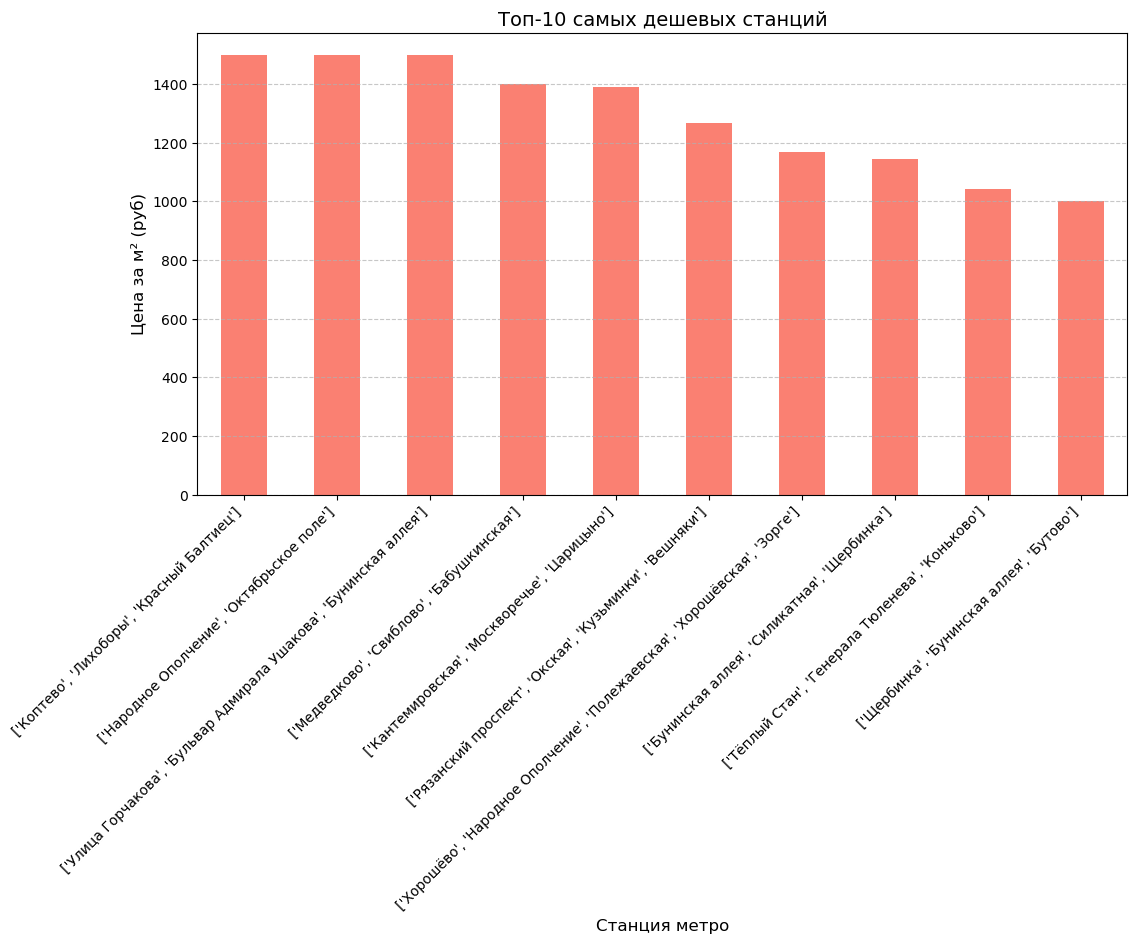

In [6]:
plt.figure(figsize=(12, 6))
avg_price_metro.tail(10).plot(kind='bar', color='salmon')
plt.title('Топ-10 самых дешевых станций', fontsize=14)
plt.xlabel('Станция метро', fontsize=12)
plt.ylabel('Цена за м² (руб)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()